### Fashion MNIST Classification
- datasets: Fashion MNIST
- learning method: supervised learning, multi classification
- learning algorithm: DNN, CNN(custom)
- frame work: Pytorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms

import work_fashion_func as work

In [2]:
train_dataset = torchvision.datasets.FashionMNIST('../data/FashionMNIST', download=False,
                                               transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST('../data/FashionMNIST', download=False, train=False,
                                                 transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
BATCH_SIZE = 100
LR = 0.001
EPOCHS = 100

In [4]:
dnn_model = work.FashionDNNModel()
cnn_model = work.FashionCNNModel()

In [5]:
print(dnn_model)
work.summary(dnn_model)

FashionDNNModel(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


Layer (type:depth-idx)                   Param #
FashionDNNModel                          --
├─Linear: 1-1                            200,960
├─Dropout: 1-2                           --
├─Linear: 1-3                            32,896
├─Linear: 1-4                            1,290
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0

In [6]:
print(cnn_model)
work.summary(cnn_model)

FashionCNNModel(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


Layer (type:depth-idx)                   Param #
FashionCNNModel                          --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       320
│    └─BatchNorm2d: 2-2                  64
│    └─ReLU: 2-3                         --
│    └─MaxPool2d: 2-4                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-5                       18,496
│    └─BatchNorm2d: 2-6                  128
│    └─ReLU: 2-7                         --
│    └─MaxPool2d: 2-8                    --
├─Linear: 1-3                            1,383,000
├─Dropout: 1-4                           --
├─Linear: 1-5                            72,120
├─Linear: 1-6                            1,210
Total params: 1,475,338
Trainable params: 1,475,338
Non-trainable params: 0

In [7]:
dnn_loss, dnn_acc, dnn_f1 = work.DNNTraining(train_dataset, dnn_model, EPOCHS, LR, BATCH_SIZE)

saved first
saved model
saved model
saved model
[    5/  100]  [Train]  loss: 0.327706, score: 0.878933
saved model
saved model
saved model
saved model
saved model
[   10/  100]  [Train]  loss: 0.274480, score: 0.897618
saved model
saved model
saved model
saved model
saved model
[   15/  100]  [Train]  loss: 0.245829, score: 0.907468
saved model
saved model
saved model
saved model
saved model
[   20/  100]  [Train]  loss: 0.226337, score: 0.913484
saved model
saved model
saved model
saved model
saved model
[   25/  100]  [Train]  loss: 0.204556, score: 0.921834
saved model
saved model
saved model
saved model
saved model
[   30/  100]  [Train]  loss: 0.191469, score: 0.926218
saved model
saved model
saved model
saved model
[   35/  100]  [Train]  loss: 0.178731, score: 0.930301
saved model
saved model
saved model
saved model
saved model
[   40/  100]  [Train]  loss: 0.169707, score: 0.934251
saved model
saved model
saved model
[   45/  100]  [Train]  loss: 0.159202, score: 0.937934
save

In [8]:
dnn_model = torch.load('../model/FashionMNIST/DNN_multi_clf_model.pth', weights_only=False)

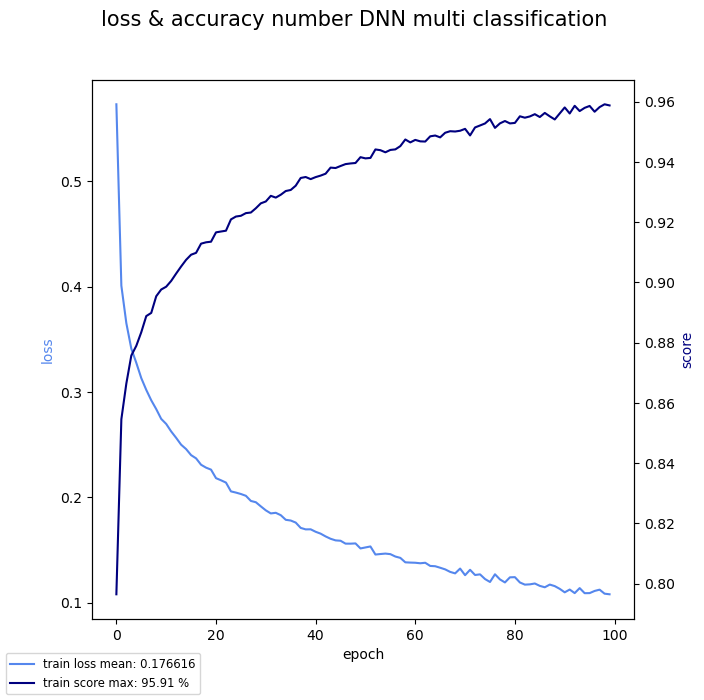

In [9]:
work.draw_two_plot(dnn_loss, dnn_acc, 'loss & accuracy', 'DNN')

In [10]:
cnn_loss, cnn_acc, cnn_f1 = work.CNNTraining(test_dataset, cnn_model, EPOCHS, LR, BATCH_SIZE)

saved first
saved model
saved model
saved model
[    5/  100]  [Train]  loss: 0.300465, score: 0.890600
saved model
saved model
saved model
saved model
saved model
[   10/  100]  [Train]  loss: 0.188794, score: 0.933900
saved model
saved model
[   15/  100]  [Train]  loss: 0.159506, score: 0.944200
saved model
saved model
saved model
[   20/  100]  [Train]  loss: 0.115028, score: 0.958800
saved model
saved model
saved model
saved model
saved model
[   25/  100]  [Train]  loss: 0.059127, score: 0.980000
saved model
saved model
[   30/  100]  [Train]  loss: 0.064776, score: 0.975400
성능 및 손실의 개선이 없어서 학습을 중단합니다.

[   33/  100]  [Train]  loss: 0.064147, score: 0.977800


In [11]:
cnn_model = torch.load('../model/FashionMNIST/CNN_multi_clf_model.pth', weights_only=False)

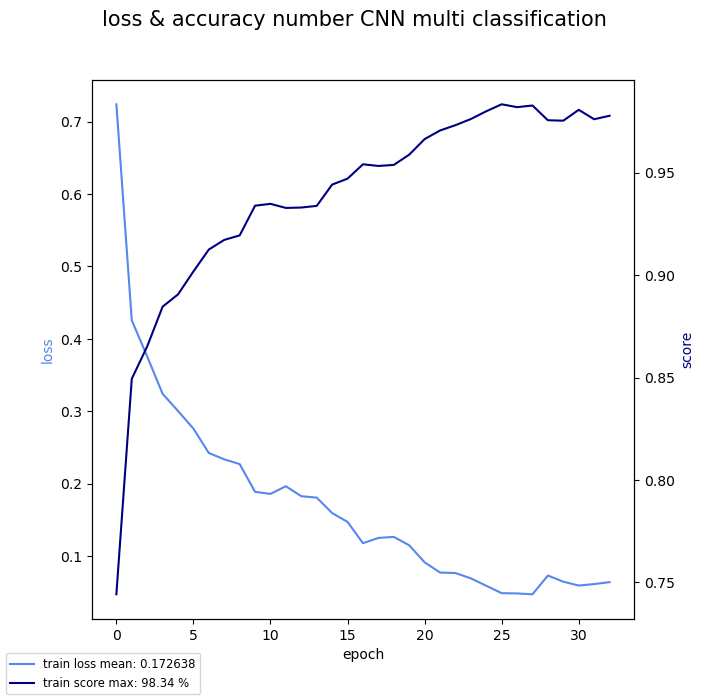

In [12]:
work.draw_two_plot(cnn_loss, cnn_acc, 'loss & accuracy', 'CNN')

In [25]:
test_loader = DataLoader(test_dataset, batch_size=1)

In [53]:
dnn_preds = []
dnn_real_labels = []
for test_images, test_labels in test_loader:
    # dnn_preds.append(work.LABEL_TRANSLATE[dnn_model(test_images).argmax().item()])
    # dnn_real_labels.append(work.LABEL_TRANSLATE[test_labels.item()])
    dnn_preds.append(dnn_model(test_images).argmax().item())
    dnn_real_labels.append(test_labels.item())

In [32]:
dnn_real_labels[0], dnn_preds[0]

('Ankle Boot', 'Ankle Boot')

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [61]:

dnn_test_mat = confusion_matrix(dnn_real_labels, dnn_preds)
dnn_test_acc = accuracy_score(dnn_real_labels, dnn_preds)
dnn_test_repot = classification_report(dnn_real_labels, dnn_preds, zero_division=0, target_names=work.LABEL_TRANSLATE.values())

In [64]:
cnn_preds = []
cnn_real_labels = []
for test_images, test_labels in test_loader:
    cnn_preds.append(cnn_model(test_images).argmax().item())
    cnn_real_labels.append(test_labels.item())
    
cnn_test_mat = confusion_matrix(cnn_real_labels, cnn_preds)
cnn_test_acc = accuracy_score(cnn_real_labels, cnn_preds)
cnn_test_repot = classification_report(cnn_real_labels, cnn_preds, zero_division=0, target_names=work.LABEL_TRANSLATE.values())

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

DNN Test Accuracy: 88.09 %
DNN Test Classification report:
              precision    recall  f1-score   support

     T-Shirt       0.82      0.84      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.78      0.78      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.73      0.66      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle Boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



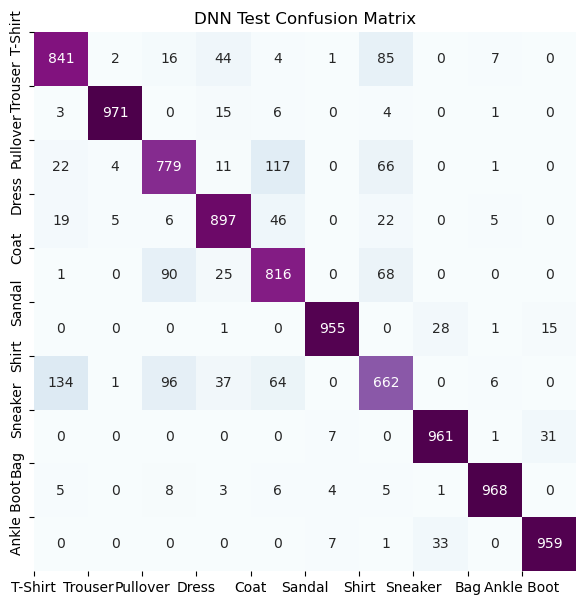

In [63]:
print(f"DNN Test Accuracy: {dnn_test_acc*100:.2f} %")
print(f"DNN Test Classification report:\n{dnn_test_repot}")

plt.figure(figsize=(7, 7))
sns.heatmap(dnn_test_mat, annot=True, fmt=f'.0f', cbar=False, cmap='BuPu')
plt.title('DNN Test Confusion Matrix')
plt.xticks(np.arange(0, 10), work.LABEL_TRANSLATE.values())
plt.yticks(np.arange(0, 10), work.LABEL_TRANSLATE.values())
plt.show()

CNN Test Accuracy: 94.64 %
CNN Test Classification report:
              precision    recall  f1-score   support

     T-Shirt       0.94      0.97      0.95      1000
     Trouser       0.97      1.00      0.99      1000
    Pullover       0.94      0.89      0.91      1000
       Dress       0.99      0.97      0.98      1000
        Coat       0.76      1.00      0.87      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.97      0.68      0.80      1000
     Sneaker       0.98      0.99      0.98      1000
         Bag       0.99      1.00      0.99      1000
  Ankle Boot       1.00      0.98      0.99      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



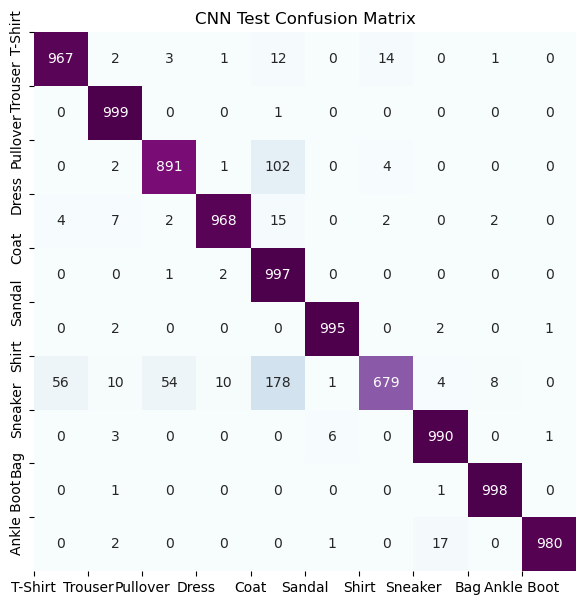

In [65]:
print(f"CNN Test Accuracy: {cnn_test_acc*100:.2f} %")
print(f"CNN Test Classification report:\n{cnn_test_repot}")

plt.figure(figsize=(7, 7))
sns.heatmap(cnn_test_mat, annot=True, fmt=f'.0f', cbar=False, cmap='BuPu')
plt.title('CNN Test Confusion Matrix')
plt.xticks(np.arange(0, 10), work.LABEL_TRANSLATE.values())
plt.yticks(np.arange(0, 10), work.LABEL_TRANSLATE.values())
plt.show()

- DNN model test Accuracy: 88.09 %
- CNN model test Accuracy: 94.64 %
- 
- CNN model이 조금 더 결과가 좋았다.

In [102]:
def predict_show(pred, type_, num):
    image_data, label = test_loader.dataset[num]
    
    print(f"{type_} predict fashion item: {work.LABEL_TRANSLATE[pred[num]]}")
    print(f"real fashion item: {work.LABEL_TRANSLATE[label]}\n")

    image_data = image_data.reshape(-1, 28)
    print(f"image data: {image_data.shape}, {image_data.ndim}D")

    plt.imshow(image_data, cmap='Purples')
    plt.title(f"[image - {work.LABEL_TRANSLATE[label]}]")
    plt.axis('off')
    plt.show()

DNN predict fashion item: Bag
real fashion item: Bag

image data: torch.Size([28, 28]), 2D


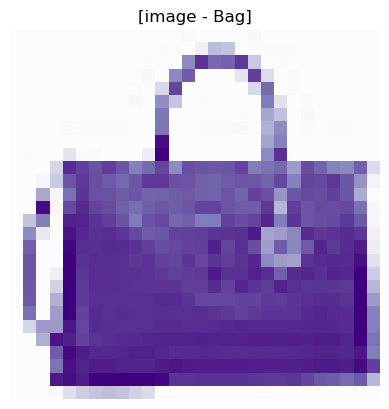

In [104]:
predict_show(dnn_preds, 'DNN', 30)

CNN predict fashion item: Coat
real fashion item: Coat

image data: torch.Size([28, 28]), 2D


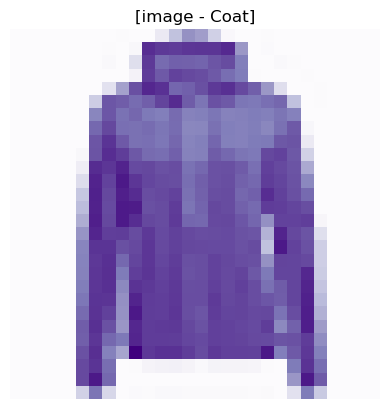

In [105]:
predict_show(cnn_preds,'CNN', 987)

In [100]:
image, label =  test_loader.dataset[0]

In [101]:
work.predict(dnn_model, image)

'Ankle Boot'